In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=False)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!ls
!pwd


drive  sample_data
/content


In [3]:
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
from tensorflow.keras import datasets, layers, models

import cv2
import numpy as np
import imutils

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
test_path = "/content/drive/My Drive/FliproboAssgn/Test"
train_path = "/content/drive/My Drive/FliproboAssgn/Train"



In [6]:
from os import listdir
from os.path import isfile, join
import numpy
import cv2

#Image augmentation definitions


def flip_image(image,dir,image_ID):
    image = cv2.flip(image, dir)
    cv2.imwrite(Folder_name +  "/flip-" + str(image_ID)+str(dir)+Extension, image)
  
def random_rotation(image, angle,image_ID):
    
    random_degree = random.uniform(-angle, angle)
    image = rotated = imutils.rotate(image, angle)
    cv2.imwrite(Folder_name + "/flip-" + str(image_ID)+str(dir)+Extension, image)

def sharpen_image(image,image_ID):
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
    image = cv2.filter2D(image, -1, kernel)
    cv2.imwrite(Folder_name+"/Sharpen-"+str(image_ID)+Extension, image)

def apply_brightness(input_img, image_ID, brightness = 0):

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        image = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        image = input_img.copy()
    
    cv2.imwrite(Folder_name+"/brighten-"+ str(image_ID)+str(brightness) + Extension, image)



In [8]:
import os
jeans_path = '/content/drive/My Drive/FliproboAssgn/Train/Jeans'
trouser_path = '/content/drive/My Drive/FliproboAssgn/Train/Trouser'

Jeans_name = [os.path.join(jeans_path, f) for f in os.listdir(jeans_path) if os.path.isfile(os.path.join(jeans_path, f))]
Trouser_name = [os.path.join(trouser_path, f) for f in os.listdir(trouser_path) if os.path.isfile(os.path.join(trouser_path, f))]


In [9]:
#Image augmentation for Jeans

Extension=".jpeg"

for name in Jeans_name:
  #label preparation for the augmented images
  image_name = name.split("/")[-1]
  image_ID = image_name.split(".")[0]
  #Reading image
  Folder_name = jeans_path
  image = cv2.imread(name)
  #Applying augmentation
  flip_image(image,0,image_ID) #horizontal
  random_rotation(image, 30,image_ID)
  sharpen_image(image,image_ID)
  apply_brightness(image,image_ID, brightness = 25)
  apply_brightness(image,image_ID, brightness = -25)


In [10]:
#Image augmentation for Trousers

Extension=".jpeg"

for name in Trouser_name:
  #label preparation for the augmented images
  image_name = name.split("/")[-1]
  image_ID = image_name.split(".")[0]
  #Reading image
  Folder_name = trouser_path
  image = cv2.imread(name)
  #Applying augmentation
  flip_image(image,0,image_ID) #horizontal
  random_rotation(image, 30,image_ID)
  sharpen_image(image,image_ID)
  apply_brightness(image,image_ID, brightness = 25)
  apply_brightness(image,image_ID, brightness = -25)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

Folder_name=train_path
Extension=".jpg"



datagen = ImageDataGenerator()
# load and iterate training dataset
train_image = datagen.flow_from_directory(train_path , class_mode='binary', batch_size=1200)
# load and iterate validation dataset
test_image = datagen.flow_from_directory(test_path , class_mode='binary', batch_size=60)
train_images, train_labels = train_image.next()
test_images, test_labels = test_image.next()

train_images, train_labels = train_image.next()
test_images, test_labels = test_image.next()



Using TensorFlow backend.


Found 1200 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [12]:


#Shape of images:
print('Shape of train images', train_images.shape)
print('Shape of test images',test_images.shape)
#print(y, y1)

Shape of train images (1200, 256, 256, 3)
Shape of test images (60, 256, 256, 3)


In [13]:
#Normalisation
train_images = train_images / 255.0
test_images = test_images / 255.0

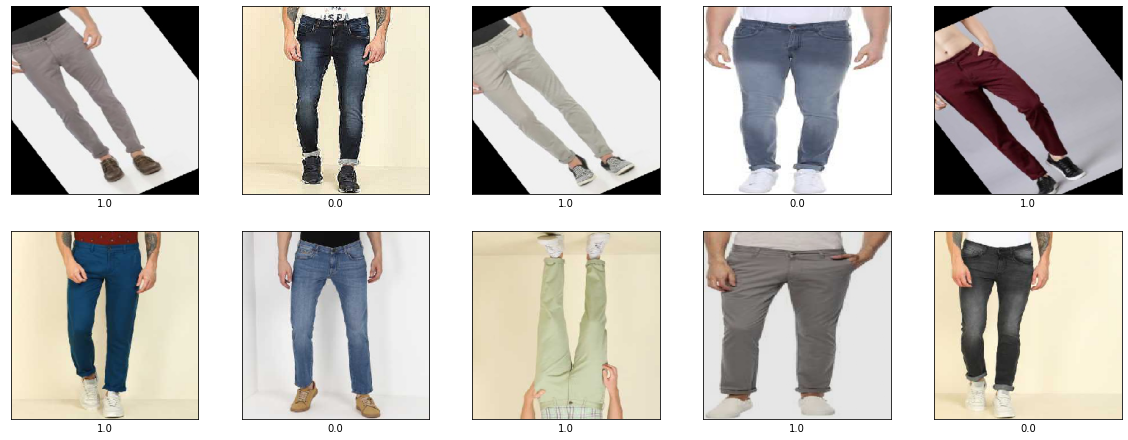

In [14]:
plt.figure(figsize=(20,20))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(train_labels[i])
plt.show()

In [21]:
#CNN model to classify the handwritten numbers:

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto',
    baseline=None, restore_best_weights=True
)

model = keras.Sequential([
  keras.layers.InputLayer(input_shape=(256, 256)),
  keras.layers.Reshape(target_shape=(256, 256, 3)), 

  keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'),
  keras.layers.MaxPooling2D(pool_size=(3,3)),
  keras.layers.Dropout(0.4),




  keras.layers.Flatten(),
  keras.layers.Dense(2)
])

opt = keras.optimizers.Adam()

model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels),
                    callbacks=[callback])

Epoch 1/20
38/38 [==============================] - 58s 2s/step - loss: 2.0164 - accuracy: 0.6408 - val_loss: 0.6599 - val_accuracy: 0.6500
Epoch 2/20
38/38 [==============================] - 58s 2s/step - loss: 0.2817 - accuracy: 0.8867 - val_loss: 0.5121 - val_accuracy: 0.7833
Epoch 3/20
38/38 [==============================] - 58s 2s/step - loss: 0.1371 - accuracy: 0.9633 - val_loss: 0.4940 - val_accuracy: 0.8167
Epoch 4/20
38/38 [==============================] - 59s 2s/step - loss: 0.0806 - accuracy: 0.9833 - val_loss: 0.6092 - val_accuracy: 0.7833
Epoch 5/20
38/38 [==============================] - 57s 1s/step - loss: 0.0421 - accuracy: 0.9942 - val_loss: 0.5532 - val_accuracy: 0.7833


In [22]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_6 (Reshape)          (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 85, 85, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 85, 85, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 462400)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 924802    
Total params: 926,594
Trainable params: 926,594
Non-trainable params: 0
________________________________________________

38/38 - 18s - loss: 0.0795 - accuracy: 0.9825
2/2 - 0s - loss: 0.4940 - accuracy: 0.8167


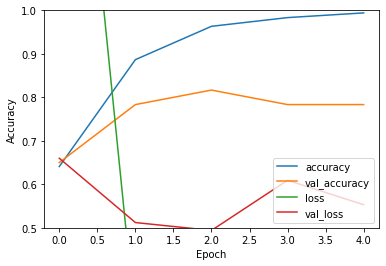

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [24]:
train_loss, train_acc = model.evaluate(train_images,  train_labels, verbose=2)
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)


38/38 - 18s - loss: 0.0795 - accuracy: 0.9825
2/2 - 0s - loss: 0.4940 - accuracy: 0.8167


0.8166666626930237

In [25]:
print("test accuracy:", test_acc)
print("train accuracy:", train_acc)

test accuracy: 0.8166666626930237
train accuracy: 0.9825000166893005
